In [15]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
celebrities = ['007', 'adrienelouise', 'allymisslove', 'badbunnypr', 'blackpinkofficial',
              'celinecelines', 'chinaealexander', 'codyrigsby', 'jerrylorenzo', 'kerwinfrost',
               'marcellasne_', 'meagankong', 'mynameisjessamyn', 'nadyaokamoto', 'pharrell',
              'sean_wotherspoon', 'walesbonner', 'yarashahidi', 'zoesaldana']
print(len(celebrities))

19


In [3]:
for celebrity in celebrities:
    with open('instagram_stories_data' + '/' + celebrity + '_t.json') as f:
        d_technical = json.load(f)
    
    df_technical = pd.json_normalize(d_technical)
    df_technical = df_technical.rename(columns={'mean_score_prediction': 'technical_score'})
    
    with open('instagram_stories_data' + '/' + celebrity + '_a.json') as f:
        d_aesthetic = json.load(f)
        
    df_aesthetic = pd.json_normalize(d_aesthetic)
    df_aesthetic = df_aesthetic.rename(columns={'mean_score_prediction': 'aesthetic_score'})
    
    df = pd.merge(df_technical, df_aesthetic, on='image_id')
    
    out_dict = {'celebrity': celebrity, 'photo_count': len(df)}
    scores_dict = df.mean().to_dict()
    out_dict.update(scores_dict)
    
    data = []
    if os.path.exists('output.json'):
        with open('output.json') as fp:    
            old_data = json.load(fp)
    else:
        old_data = []

    for element in old_data:
        data.append(element)

    data.append(out_dict)

    with open("output.json", "w") as fp:
        json.dump(data, fp)
    
    print(celebrity + ' entry completed.')

007 entry completed.
adrienelouise entry completed.
allymisslove entry completed.
badbunnypr entry completed.
blackpinkofficial entry completed.
celinecelines entry completed.
chinaealexander entry completed.
codyrigsby entry completed.
jerrylorenzo entry completed.
kerwinfrost entry completed.
marcellasne_ entry completed.
meagankong entry completed.
mynameisjessamyn entry completed.
nadyaokamoto entry completed.
pharrell entry completed.
sean_wotherspoon entry completed.
walesbonner entry completed.
yarashahidi entry completed.
zoesaldana entry completed.


In [6]:
with open('output.json') as fp:
    data = json.load(fp)

df = pd.json_normalize(data)
df

,celebrity,photo_count,technical_score,aesthetic_score
0,007,14,4.602763,5.092245
1,adrienelouise,212,4.960116,4.897504
2,allymisslove,218,5.311100,4.937519
3,badbunnypr,35,5.113006,4.656550
4,blackpinkofficial,19,5.359560,5.012110
5,celinecelines,257,4.882722,4.850272
6,chinaealexander,358,5.715287,4.984094
7,codyrigsby,56,5.370911,4.979106
8,jerrylorenzo,86,5.217754,5.102251
9,kerwinfrost,15,5.675344,5.163311


In [7]:
df.nlargest(3,'technical_score')

,celebrity,photo_count,technical_score,aesthetic_score
6,chinaealexander,358,5.715287,4.984094
16,walesbonner,22,5.698583,4.565688
9,kerwinfrost,15,5.675344,5.163311


In [8]:
df.nlargest(3,'aesthetic_score')

,celebrity,photo_count,technical_score,aesthetic_score
9,kerwinfrost,15,5.675344,5.163311
8,jerrylorenzo,86,5.217754,5.102251
13,nadyaokamoto,128,5.204796,5.097163


In [9]:
df.nsmallest(3,'technical_score')

,celebrity,photo_count,technical_score,aesthetic_score
0,007,14,4.602763,5.092245
5,celinecelines,257,4.882722,4.850272
1,adrienelouise,212,4.960116,4.897504


In [10]:
df.nsmallest(3,'aesthetic_score')

,celebrity,photo_count,technical_score,aesthetic_score
16,walesbonner,22,5.698583,4.565688
3,badbunnypr,35,5.113006,4.656550
5,celinecelines,257,4.882722,4.850272


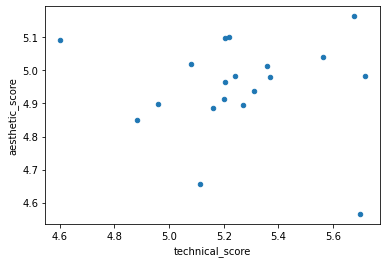

In [13]:
df.plot.scatter(x='technical_score', y='aesthetic_score')

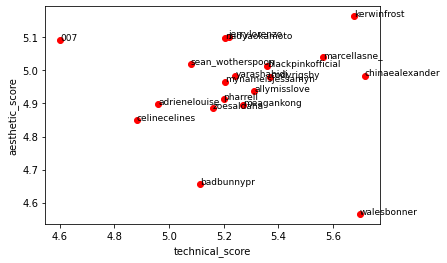

In [22]:
# open figure + axis
fig, ax = plt.subplots()
# plot
ax.scatter(x=df['technical_score'],y=df['aesthetic_score'],c='Red')
# set labels
ax.set_xlabel('technical_score')
ax.set_ylabel('aesthetic_score')

# annotate points in axis
for idx, row in df.iterrows():
    ax.annotate(row['celebrity'], (row['technical_score'], row['aesthetic_score']),size=9)
# force matplotlib to draw the graph
plt.show()